# **Monografía**
# **Breast Cancer Classifier**

### Estudiante:


**Nombre Completo:** Juan Camilo Peña Vahos

**Cédula:** 1020474173



In [1]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=16kUWvBmfYPlr5kdwGt9FheBCd7celt14' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=16kUWvBmfYPlr5kdwGt9FheBCd7celt14" -O dataset.zip && rm -rf /tmp/cookies.txt

--2022-01-31 13:04:47--  https://docs.google.com/uc?export=download&confirm=&id=16kUWvBmfYPlr5kdwGt9FheBCd7celt14
Resolving docs.google.com (docs.google.com)... 142.250.141.139, 142.250.141.101, 142.250.141.113, ...
Connecting to docs.google.com (docs.google.com)|142.250.141.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-1k-docs.googleusercontent.com/docs/securesc/enpnm85rkm8fl2l9u9bocbocvnv227r7/l20c3hvr4le29773h71atl34nu678jgc/1643634225000/02982550991977666471/00909171668616970136Z/16kUWvBmfYPlr5kdwGt9FheBCd7celt14?e=download [following]
--2022-01-31 13:04:48--  https://doc-0s-1k-docs.googleusercontent.com/docs/securesc/enpnm85rkm8fl2l9u9bocbocvnv227r7/l20c3hvr4le29773h71atl34nu678jgc/1643634225000/02982550991977666471/00909171668616970136Z/16kUWvBmfYPlr5kdwGt9FheBCd7celt14?e=download
Resolving doc-0s-1k-docs.googleusercontent.com (doc-0s-1k-docs.googleusercontent.com)... 142.250.141.132, 2607:f8b0:4023:c0b::84
Connecting to doc

In [2]:
!unzip "dataset.zip" -d "/content/dataset/"


Archive:  dataset.zip
  inflating: /content/dataset/breast-cancer.csv  
  inflating: /content/dataset/__MACOSX/._breast-cancer.csv  


# Imports

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

# Data Loading

Se utilizaran los 3 datasets de este link: https://www.kaggle.com/alsgroup/end-als

In [4]:
df_breast_cancer = pd.read_csv('/content/dataset/breast-cancer.csv')

In [5]:
df_breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df_breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df_breast_cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


De acuerdo con la tabla anterior no tenemos ningún dato nulo o faltante. Lo siguiente será reconocer cuántos tipos de diagnósticos (etiquetas) tenemos


In [8]:
df_breast_cancer.diagnosis.unique()

array(['M', 'B'], dtype=object)

Lo anterior indica que tenemos solo dos etiquetas. M (Malign), B (Benign)

Ahora, vamos a buscar datos atípicos que puedan sesgar el modelo. Para ello debemos remover las carácterísticas descriptivas como lo es la etiqueta de diagnosis

In [17]:
df_breast_cancer_numbers = df_breast_cancer.drop(columns = ['diagnosis'])

In [18]:
from sklearn.neighbors import LocalOutlierFactor
from matplotlib import pyplot

LOF = LocalOutlierFactor(n_neighbors = 5, algorithm = 'auto', metric = 'euclidean')
Filtrado = LOF.fit_predict(df_breast_cancer_numbers)
NOF = LOF.negative_outlier_factor_

radio_outiler = (NOF.max() - NOF)/(NOF.max() - NOF.min())
ground_truth = np.ones(len(df_breast_cancer_numbers), dtype = int)
n_errors = (Filtrado != ground_truth).sum()

In [22]:
print("Número de muestras o filas con datos atípicos: ", n_errors)

Número de muestras o filas con datos atípicos:  58


Ahora vamos a eliminar las muestras que el algoritmo determinó como datos atípicos

In [23]:
pos = np.where(Filtrado == ground_truth)
pos = np.asarray(pos)
pos = np.hstack(pos)
df_breast_cancer_LOF = df_breast_cancer.loc[pos, :]
print("Número de muestras sin outilers:", df_breast_cancer_LOF.shape[0])
display(df_breast_cancer_LOF)

Número de muestras sin outilers: 511


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,0.9622,1.0260,8.758,118.80,0.006399,0.04310,0.07845,0.02624,0.02057,0.006213,24.29,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.45,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.69,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.98,34.12,126.70,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820


1. Implementando el módelos de KNN

Lo primero será revisar el balanceo de las clases


In [39]:
print("Número de muestras malignas: ", np.sum(df_breast_cancer_LOF['diagnosis'] == 'M'))
print("Número de muestras benignas: ", np.sum(df_breast_cancer_LOF['diagnosis'] == 'B'))

Número de muestras malignas:  166
Número de muestras benignas:  345


In [40]:
X = df_breast_cancer_LOF.drop(columns = ['diagnosis'])
Y = df_breast_cancer_LOF['diagnosis']

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV


In [45]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3, random_state=1)


#Normalizamos
scaler = StandardScaler().fit(Xtrain)
XtrainN = scaler.transform(Xtrain)
XtestN = scaler.transform(Xtest)

Vamos a usar un GridSearch para buscar la mejor combinación de hiperparámetros

In [46]:
st = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

In [47]:
np.random.seed(4)

k=[1,3,5,7,9,11]
knn = KNeighborsClassifier()
parameters = {'n_neighbors':k, 'metric':['euclidean','manhattan','chebyshev']}

clf = GridSearchCV(estimator=knn, param_grid = parameters, cv=st, scoring='accuracy', return_train_score=True)
clf.fit(XtrainN, Ytrain)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.2, train_size=None),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11]},
             return_train_score=True, scoring='accuracy')

In [49]:
print(f'El score para la clf es : {round(clf.best_score_*100,3)}%')
print(f'\nLos mejores hiperparametros para el clf son: {clf.best_params_}')

El score para la clf es : 95.0%

Los mejores hiperparametros para el clf son: {'metric': 'euclidean', 'n_neighbors': 3}


Revisemos la matriz de confusión

Text(0.5, 1.0, 'CM')

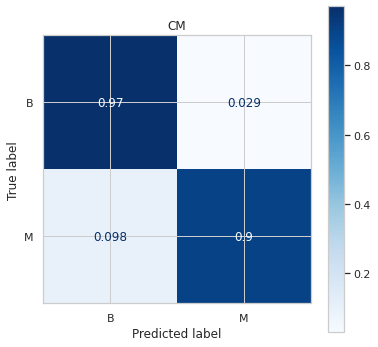

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay.from_estimator(
    clf, XtestN, Ytest,
    cmap=plt.cm.Blues,
    normalize='true',
    ax=ax)

disp.ax_.set_title('CM')